<a href="https://colab.research.google.com/github/GrishkaYesenin/Medical-Image-Detection-ML/blob/main/Main_Improved_YOLOv7_Algorithm_for_Detecting_Bone_Marrow_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard

# Show data

https://huggingface.co/datasets/keremberke/blood-cell-object-detection

**Number of Images**

'train': 255, 'test': 36, 'validation': 73

**Dataset Labels**
['platelets', 'rbc', 'wbc']

In [ ]:
# example

{'image_id': 148,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=416x416>,
 'width': 416,
 'height': 416,
 'objects': {'id': [1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995],
  'area': [4588, 7735, 6498, 4693, 9082, 3444, 8917, 3111, 955],
  'bbox': [[1.0, 142.0, 57.0, 80.5],
   [30.0, 58.0, 81.0, 95.5],
   [188.0, 76.0, 69.5, 93.5],
   [232.0, 160.0, 63.0, 74.5],
   [63.0, 278.0, 86.5, 105.0],
   [9.0, 281.0, 56.0, 61.5],
   [142.0, 157.0, 74.0, 120.5],
   [69.0, 204.0, 49.0, 63.5],
   [33.0, 30.0, 24.5, 39.0]],
  'category': [1, 1, 1, 1, 1, 1, 2, 0, 0]}}

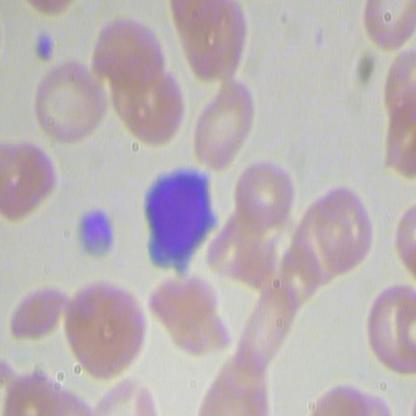

In [ ]:
# example["image"]

In [ ]:
# ds["train"]

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 255
})

# Install YOLO8

In [11]:
!pip install ultralytics

In [12]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'benchmark', 'train', 'track', 'predict', 'export'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'segment', 'pose', 'obb', 'detect'}
                MODE (required) is one of {'val', 'benchmark', 'train', 'track', 'predict', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

### Install Roboflow

to directly read our training data. For colab, we are going to find a workaround to handle encoding issues by the platform. In fact, we may encounter encoding issues for other tasks in Colab so let's go ahead and run the following cell.

In [13]:
!pip install roboflow

In [14]:
from roboflow import Roboflow

rf = Roboflow(api_key="dLgRCyS3mzG4YTn5JIQF")
project = rf.workspace("team-roboflow").project("blood-cell-detection-1ekwu")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.11, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Blood-Cell-Detection-3 in yolov8:: 100%|██████████| 740/740 [00:00<00:00, 4050.48it/s]


TODO: Open .yaml file to change write way to test train and valid data

### Train the Model



In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=416

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=20 imgsz=416

#  Export Custom Trained Ultralytics YOLOv8 Model

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/yolov8/weights

cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory


# Predict

 Путь если модель обучается впервые:

In [ ]:
# weights_way = "/content/runs/detect/train/weights/best.pt"

Using Our Uploaded Model Weights:

In [18]:
import os.path
from os import path

if path.exists('/content/yolov8') == False:
  os.mkdir('/content/yolov8/')
  os.mkdir('/content/yolov8/weights')

os.chdir('/content/yolov8/weights')
!pwd
!ls

/content/yolov8/weights
Blood-Cell-Detection-3


In [19]:
# Copy weights from our Google Drive to a folder called "weights" in our YOLO5 directory.
%cp /content/gdrive/My\ Drive/weights/best.pt /content/yolov8/weights

In [20]:
# !yolo task=detect mode=predict model=/content/yolov8/weights/best.pt conf=0.5 source={dataset.location}/test/images imgsz=416

In [ ]:
model = YOLO("/content/yolov8/weights/best.pt")
results = model.predict(source=f"{dataset.location}/test/images" ,show=True, imgsz=416, save_txt=True)

# Show results

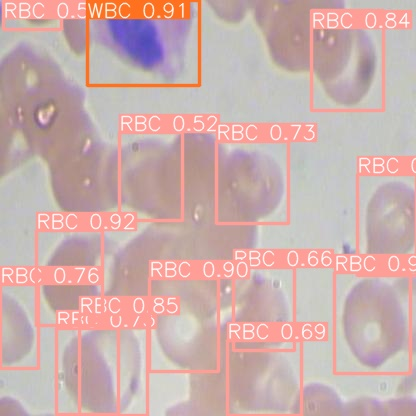

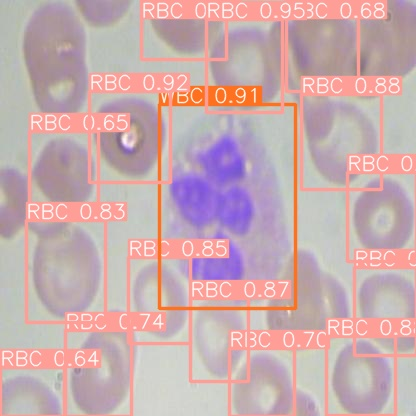

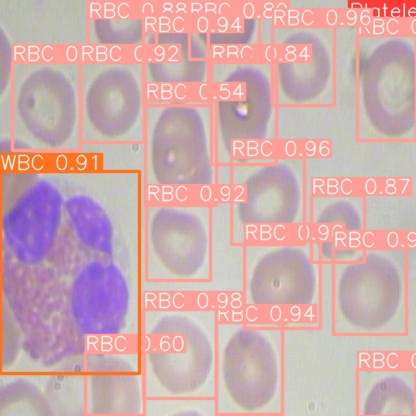

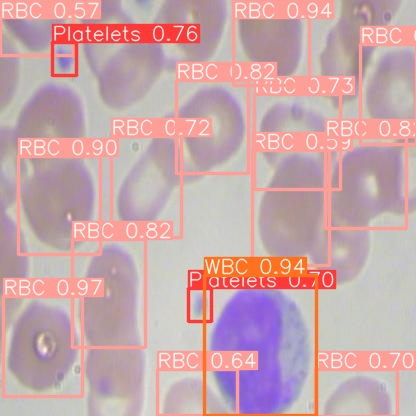

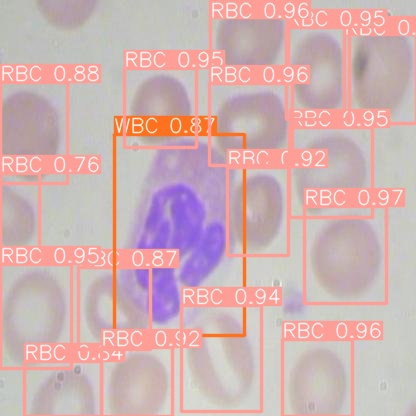

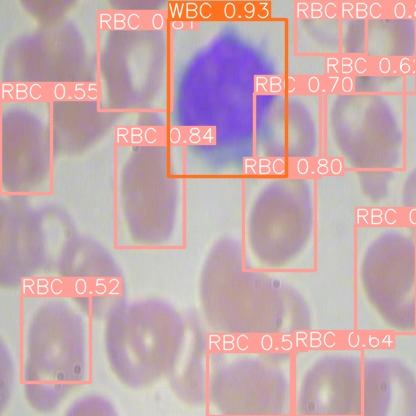

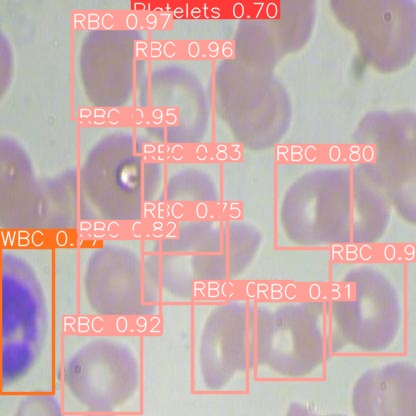

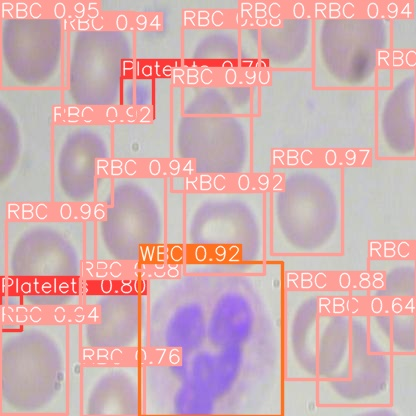

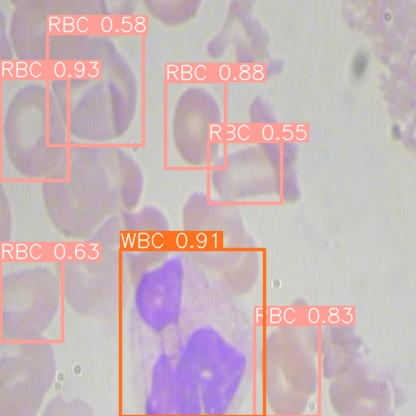

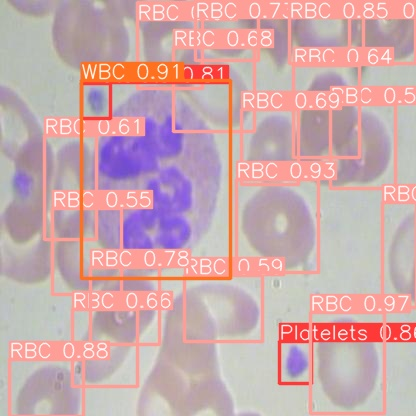

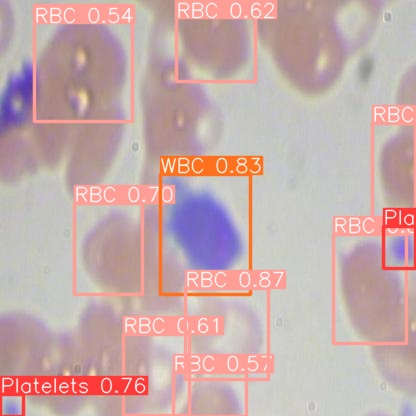

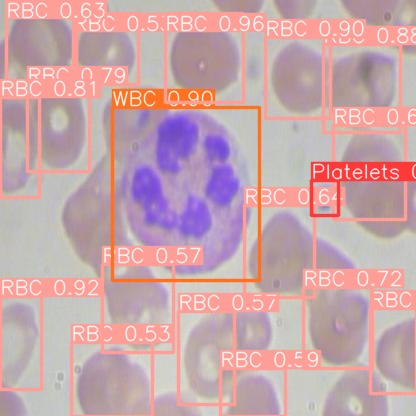

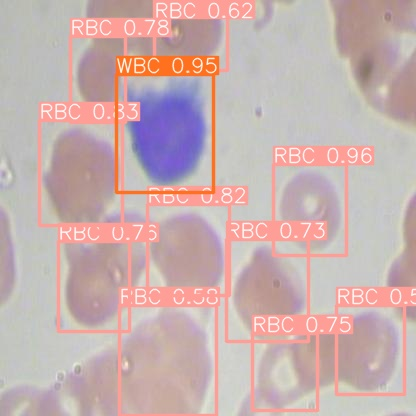

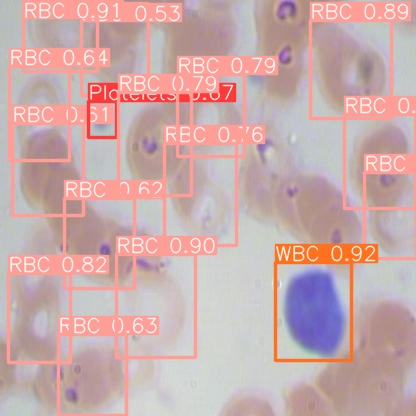

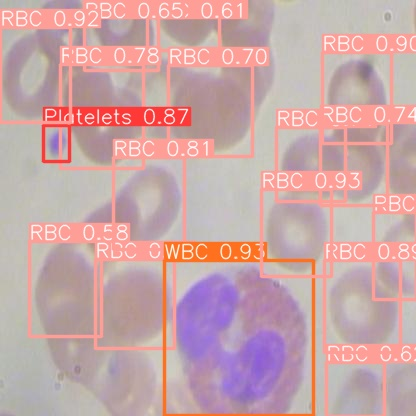

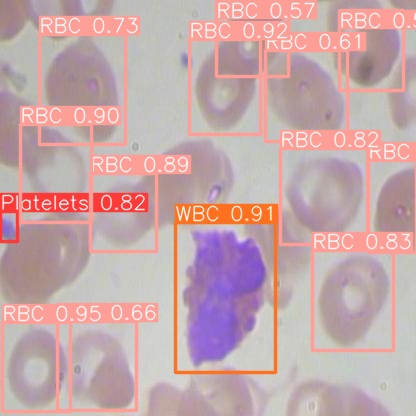

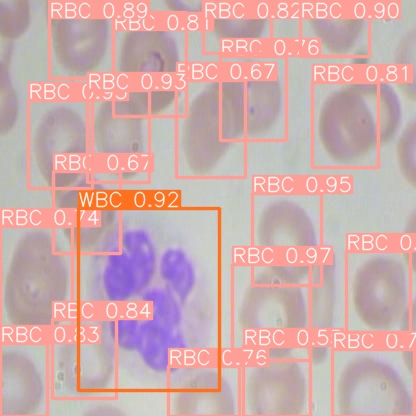

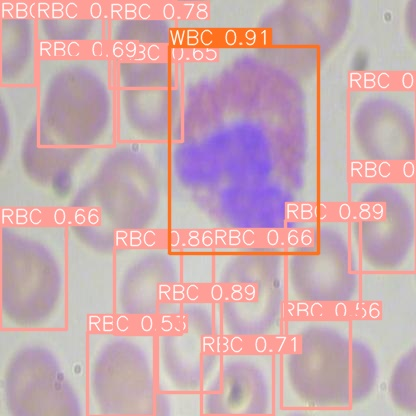

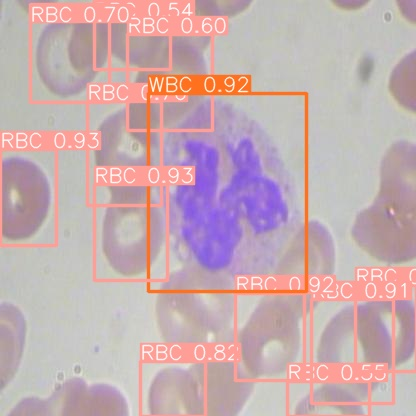

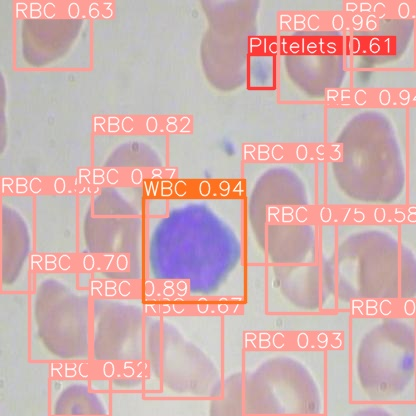

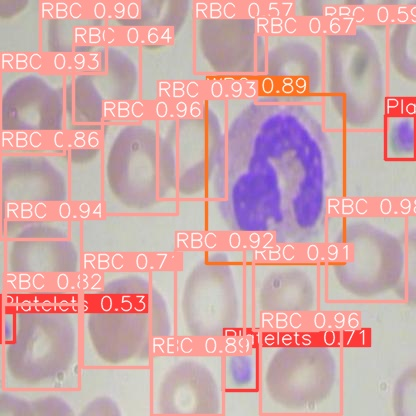

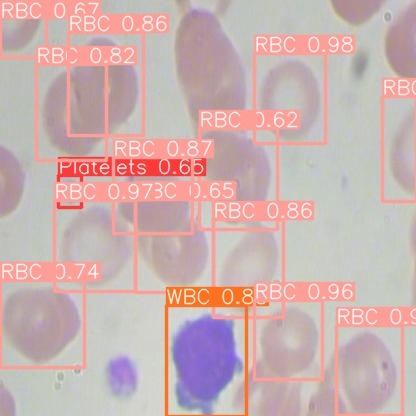

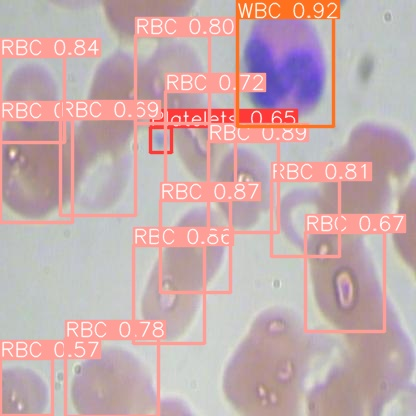

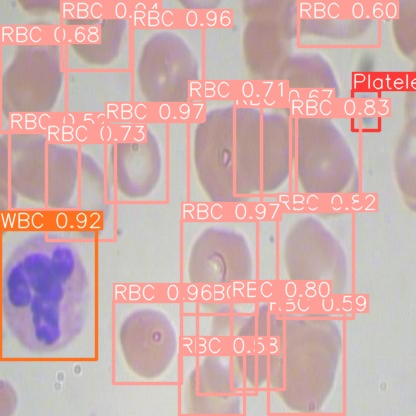

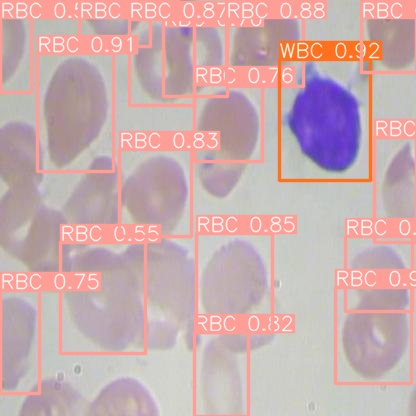

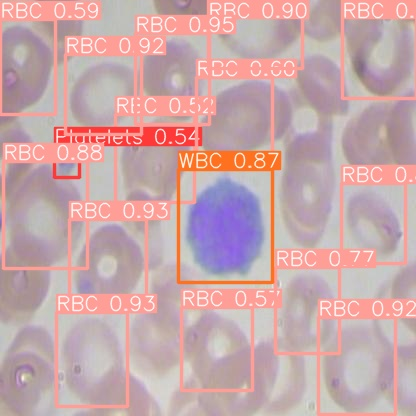

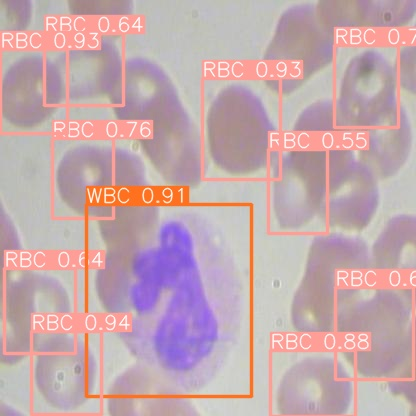

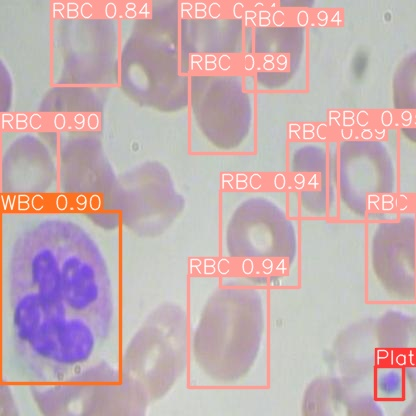

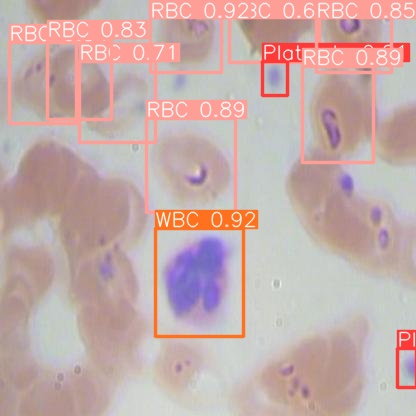

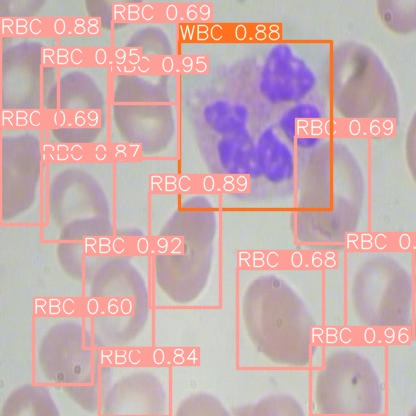

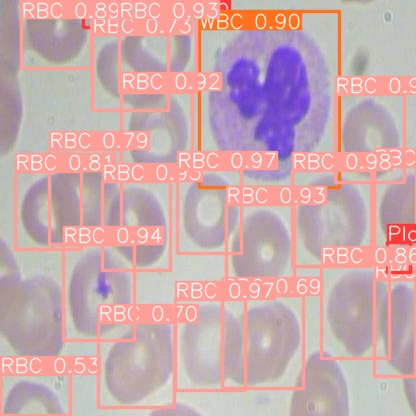

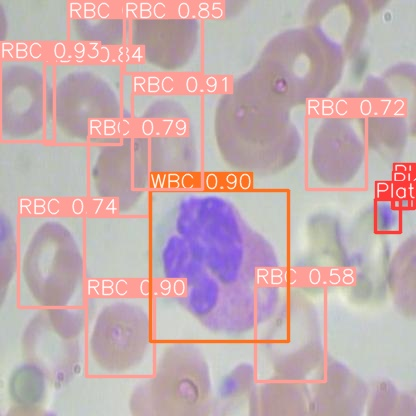

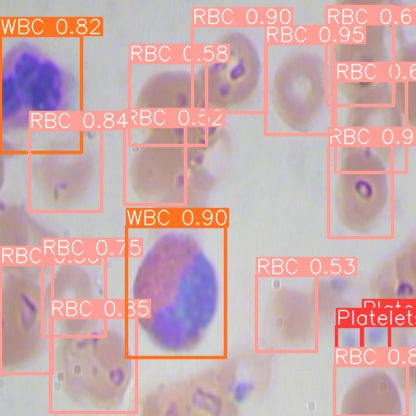

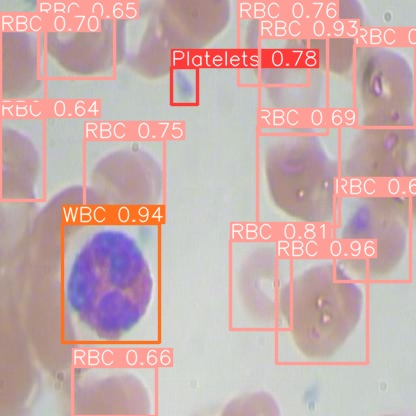

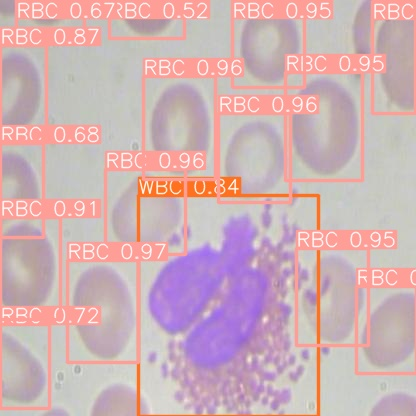

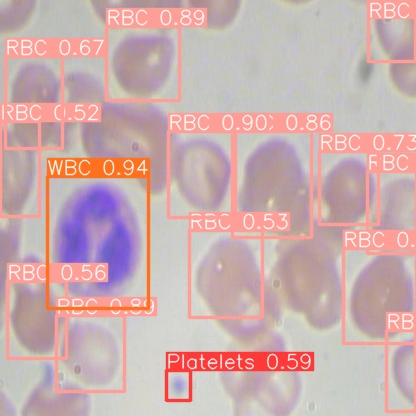

In [ ]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f"/content/yolov8/weights/runs/detect/predict/*.jpg"):
  display(Image(filename=image_path, width=600))
  print()

# Prepare custom dataset: split full-size big image into fragments with overlaping

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [21]:
from PIL import Image
image_path = "/content/gdrive/MyDrive/full_sized_image/full_sized_image"
im = Image.open(image_path + ".jpg")
new_size = 2500
im1 = im.resize((new_size, new_size))
im1.save(image_path + ".jpg")
im2 = im1.crop((0, 0, 416, 416))
# print(im2.size)
im2.show()
im2.save(image_path + "_resized.jpg")

In [23]:
model = YOLO("/content/yolov8/weights/best.pt")
results = model.predict(source=image_path  + ".jpg",show=True, imgsz=416)
for result in results:
  print(result.save_dir)
  result.save(filename='/content/result.jpg')

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/gdrive/MyDrive/full_sized_image/full_sized_image.jpg: 416x416 13 Plateletss, 1 WBC, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 3191.1ms postprocess per image at shape (1, 3, 416, 416)
runs/detect/predict


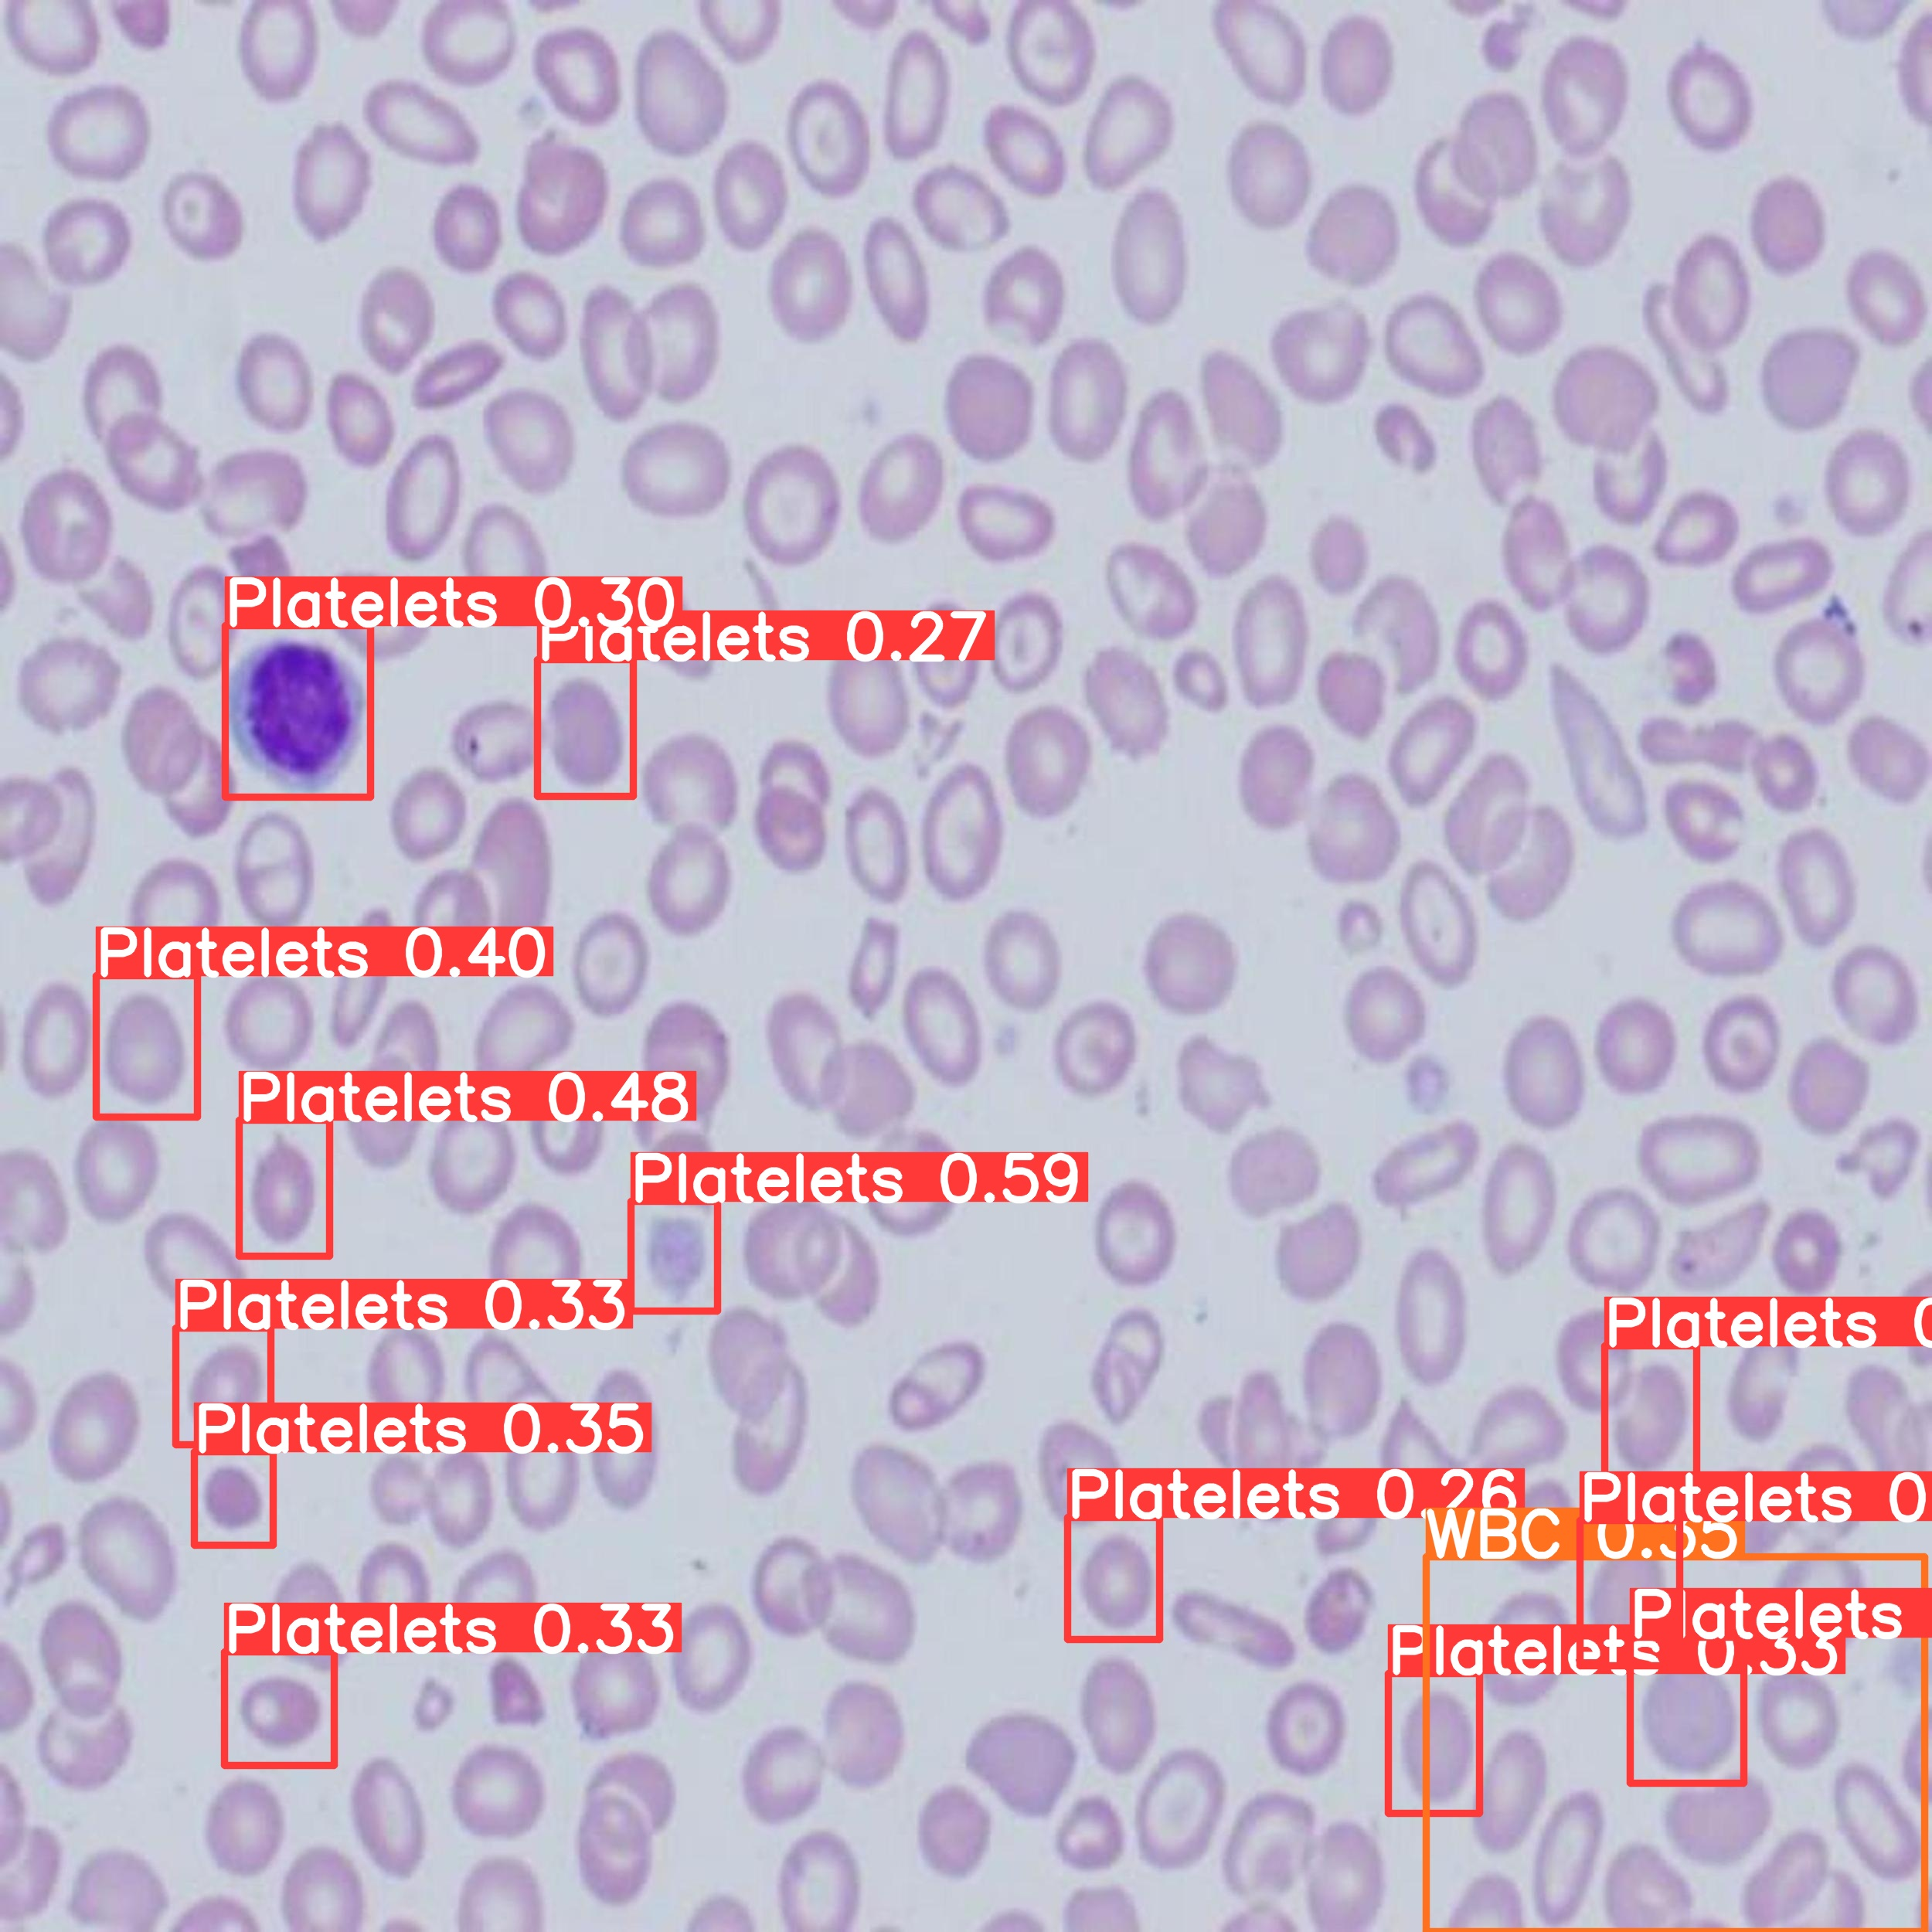

In [24]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f'/content/result.jpg'):
  display(Image(filename=image_path, width=600))
  print()

In [25]:
%cp /content/result.jpg /content/gdrive/My\ Drive

### Поиск максимальной стороны bounding box для нахождения параметра шага скользящего окна

In [26]:
MAX_LEN_OF_BOX = 0
for i in range(len(results)):
  len_of_box = max([max(box.xywh[0][2], box.xywh[0][3]) for box in results[i].boxes])
  # print( f"max в {i}: {len_of_box} ")
  if len_of_box > MAX_LEN_OF_BOX: MAX_LEN_OF_BOX = len_of_box
MAX_LEN_OF_BOX

tensor(644.7742, device='cuda:0')

Размер полносвязного изображения должен быть n * 416 - (n - 1) * shift, где n и shift - целые числа \
(416-163)*n + 163 = img_size \
253*n + 163 = img_size \
img_size = {1934, 2187, 2440}


In [27]:
import torch

In [28]:
shift = 163
n = 8
new_size = 2187

In [29]:
from PIL import Image
image_path = "/content/full_sized_image"

im3 = im1.resize((new_size, new_size))
im3.show()

In [30]:
%cp /content/full_sized_image2.jpg /content/gdrive/My\ Drive

cp: cannot stat '/content/full_sized_image2.jpg': No such file or directory


In [61]:
import os.path
from os import path

if path.exists('/content/fragments/') == False:
  os.mkdir('/content/fragments/')

os.chdir('/content/fragments/')
!pwd
!ls

/content/fragments


In [62]:
image_path = "/content/fragments/fragment"
x, y = 0, 0
for y in range(0, new_size - 415, 416 - shift):
  for x in range(0, new_size - 415, 416 - shift):
    fragment_im= im.crop((x, y, x + 415, y + 415))
    fragment_im.save(image_path + f"{y}_{x}.jpg")
    print(image_path +f"{y}_{x}.jpg", (x, y, x + 415, y + 415))

/content/fragments/fragment0_0.jpg (0, 0, 415, 415)
/content/fragments/fragment0_253.jpg (253, 0, 668, 415)
/content/fragments/fragment0_506.jpg (506, 0, 921, 415)
/content/fragments/fragment0_759.jpg (759, 0, 1174, 415)
/content/fragments/fragment0_1012.jpg (1012, 0, 1427, 415)
/content/fragments/fragment0_1265.jpg (1265, 0, 1680, 415)
/content/fragments/fragment0_1518.jpg (1518, 0, 1933, 415)
/content/fragments/fragment0_1771.jpg (1771, 0, 2186, 415)
/content/fragments/fragment253_0.jpg (0, 253, 415, 668)
/content/fragments/fragment253_253.jpg (253, 253, 668, 668)
/content/fragments/fragment253_506.jpg (506, 253, 921, 668)
/content/fragments/fragment253_759.jpg (759, 253, 1174, 668)
/content/fragments/fragment253_1012.jpg (1012, 253, 1427, 668)
/content/fragments/fragment253_1265.jpg (1265, 253, 1680, 668)
/content/fragments/fragment253_1518.jpg (1518, 253, 1933, 668)
/content/fragments/fragment253_1771.jpg (1771, 253, 2186, 668)
/content/fragments/fragment506_0.jpg (0, 506, 415, 921

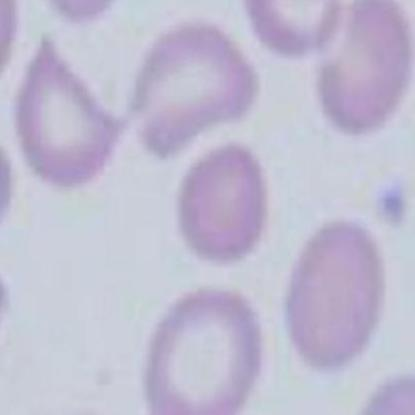

/content/fragments/fragment1771_1771.jpg


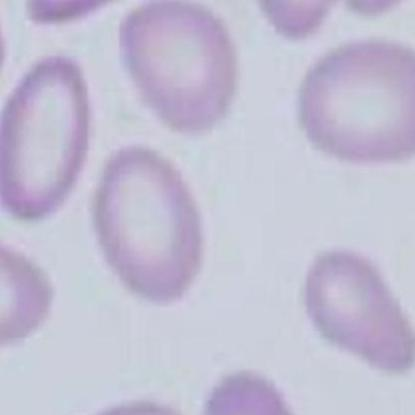

/content/fragments/fragment506_506.jpg


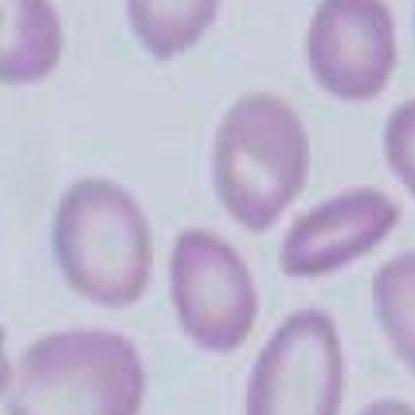

/content/fragments/fragment253_253.jpg


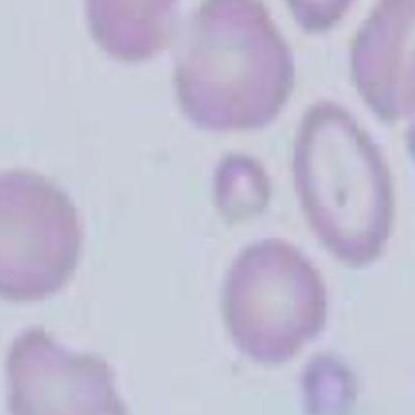

/content/fragments/fragment1012_1518.jpg


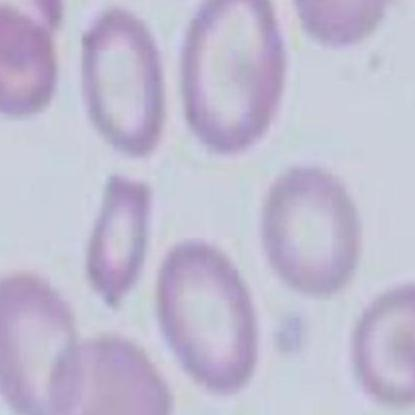

/content/fragments/fragment1012_1012.jpg


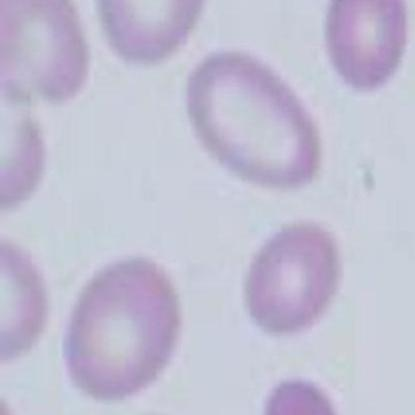

/content/fragments/fragment1518_0.jpg


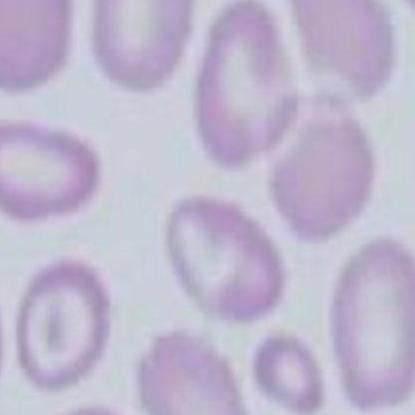

/content/fragments/fragment506_1265.jpg


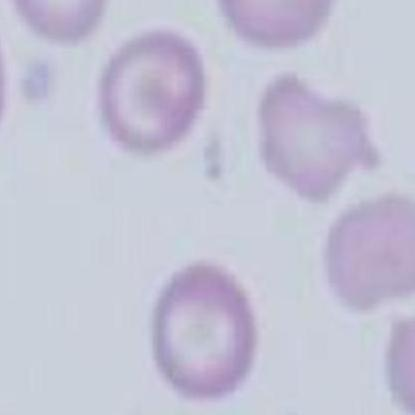

/content/fragments/fragment1265_1265.jpg


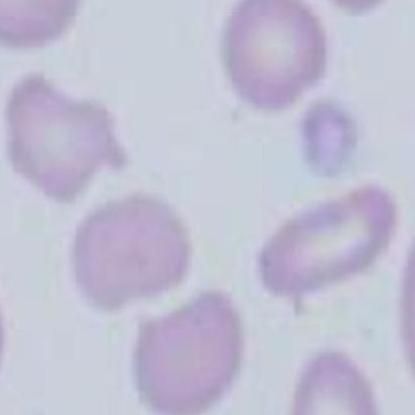

/content/fragments/fragment1265_1518.jpg


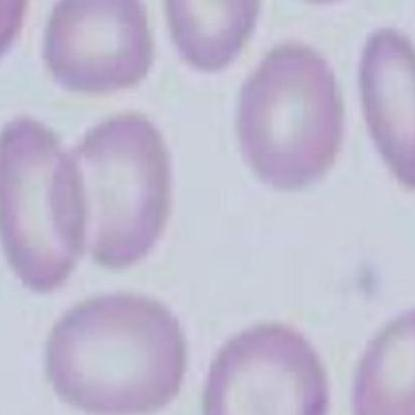

/content/fragments/fragment253_759.jpg


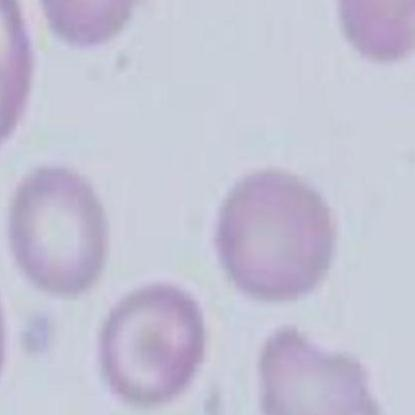

/content/fragments/fragment1012_1265.jpg


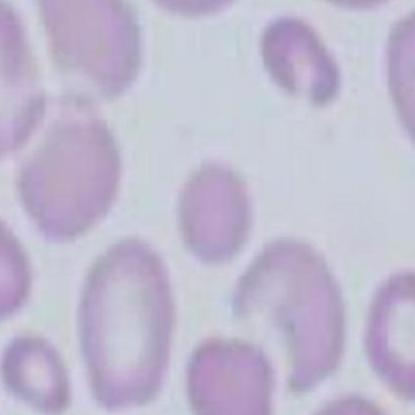

/content/fragments/fragment506_1518.jpg


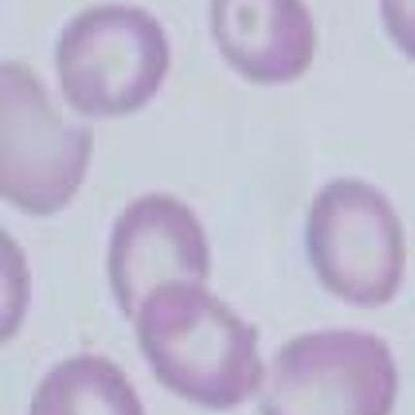

/content/fragments/fragment253_0.jpg


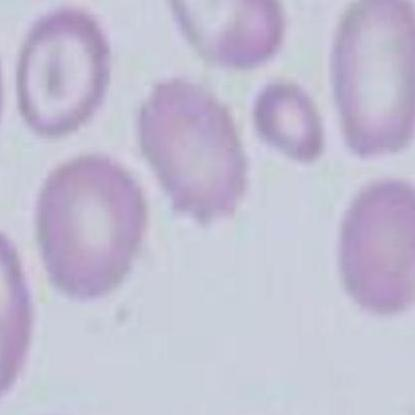

/content/fragments/fragment759_1265.jpg


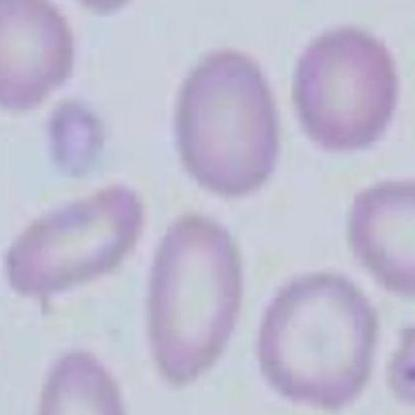

/content/fragments/fragment1265_1771.jpg


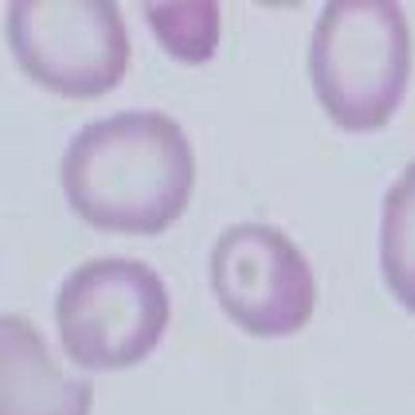

/content/fragments/fragment0_0.jpg


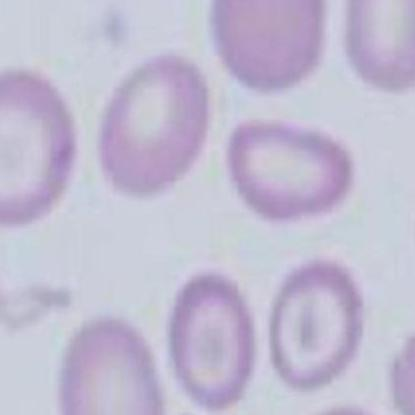

/content/fragments/fragment506_1012.jpg


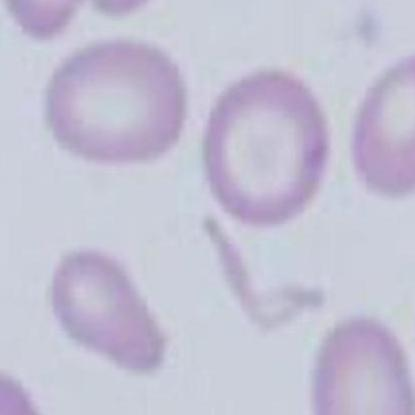

/content/fragments/fragment506_759.jpg


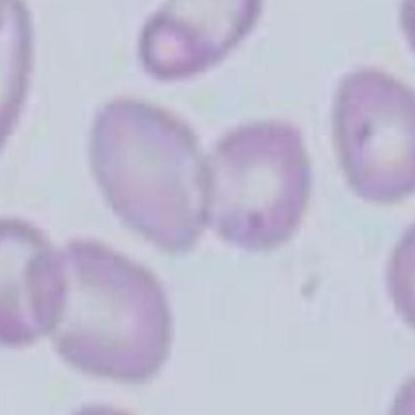

/content/fragments/fragment1771_1012.jpg


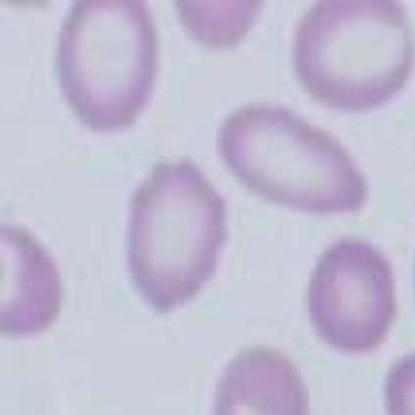

/content/fragments/fragment0_253.jpg


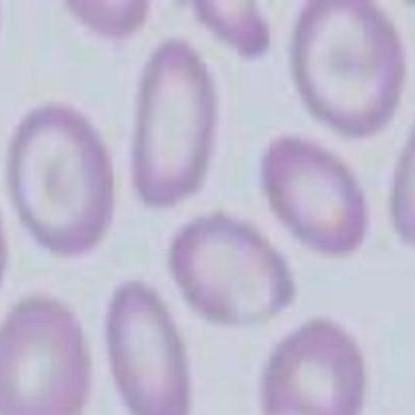

/content/fragments/fragment0_1012.jpg


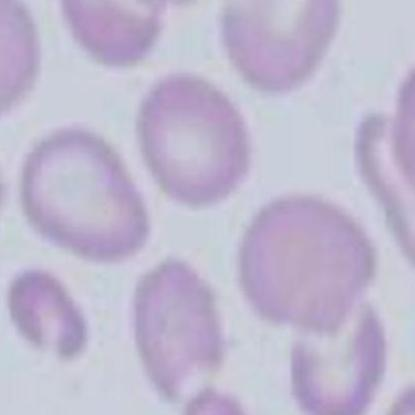

/content/fragments/fragment253_1771.jpg


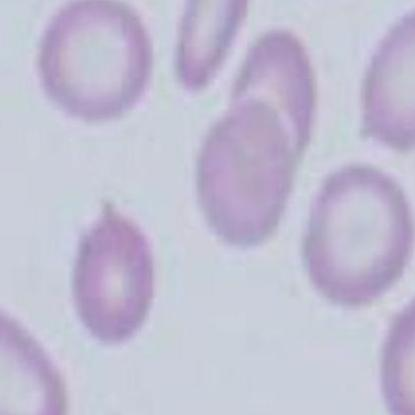

/content/fragments/fragment1265_253.jpg


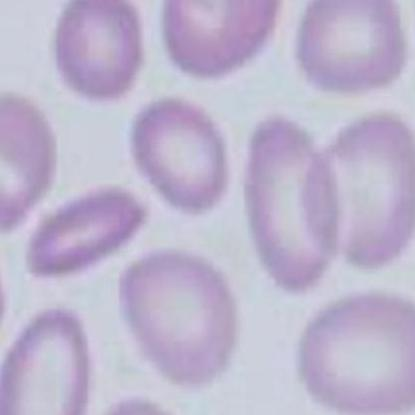

/content/fragments/fragment253_506.jpg


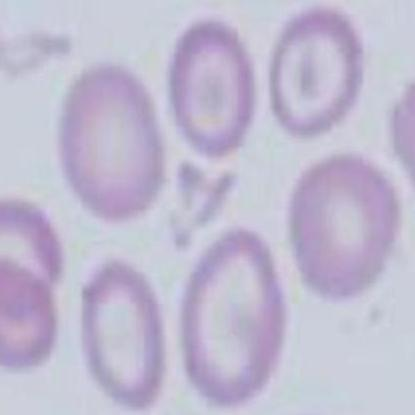

/content/fragments/fragment759_1012.jpg


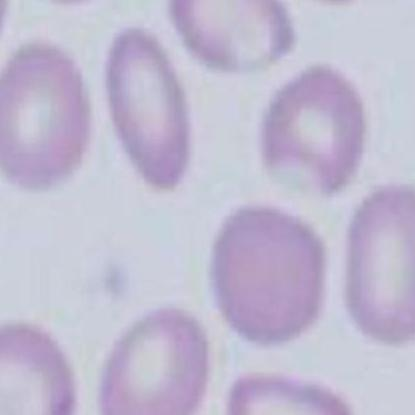

/content/fragments/fragment253_1012.jpg


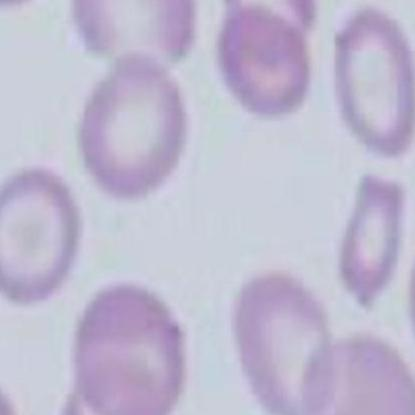

/content/fragments/fragment1012_759.jpg


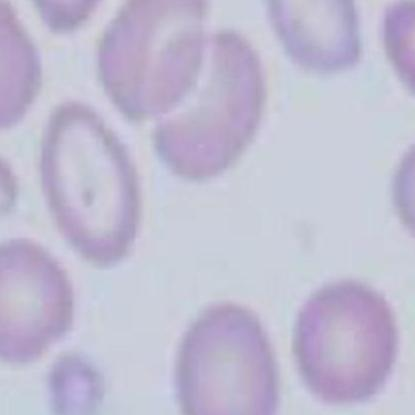

/content/fragments/fragment1012_1771.jpg


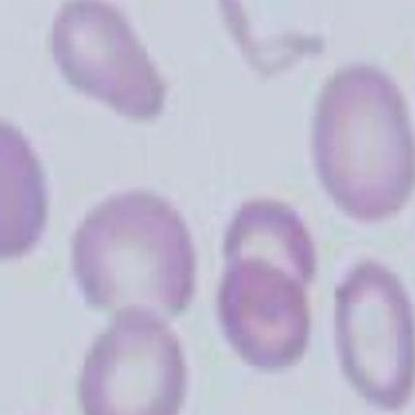

/content/fragments/fragment759_759.jpg


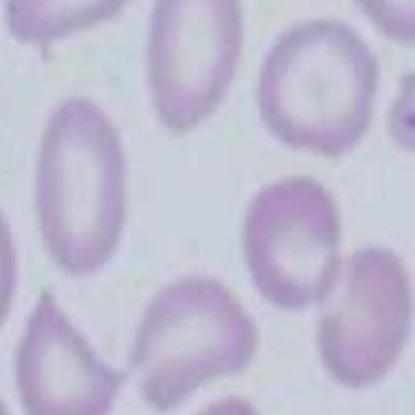

/content/fragments/fragment1518_1771.jpg


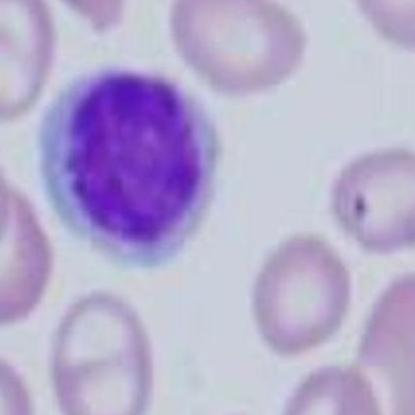

/content/fragments/fragment759_253.jpg


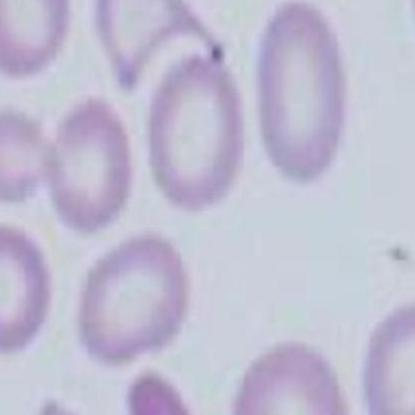

/content/fragments/fragment1771_506.jpg


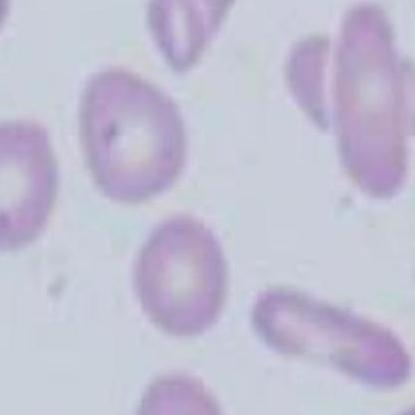

/content/fragments/fragment1771_1265.jpg


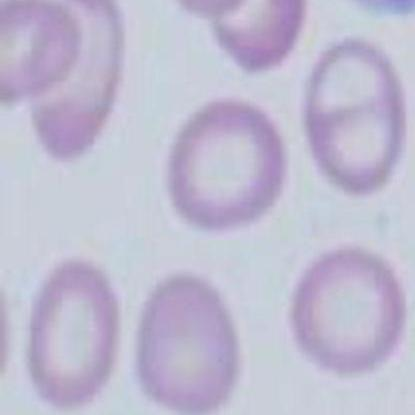

/content/fragments/fragment1012_0.jpg


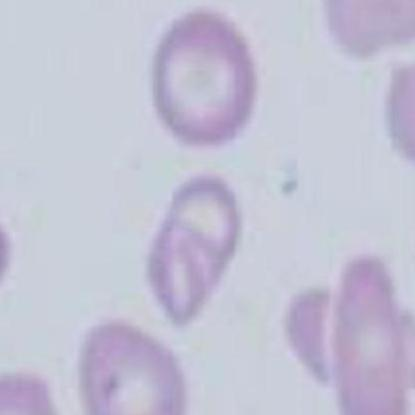

/content/fragments/fragment1518_1265.jpg


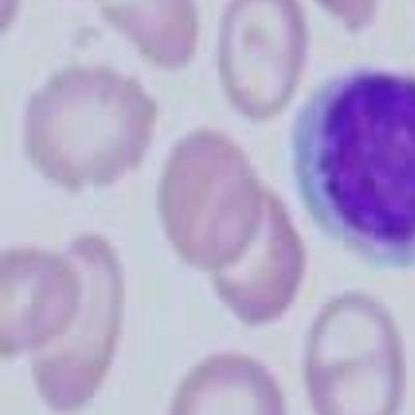

/content/fragments/fragment759_0.jpg


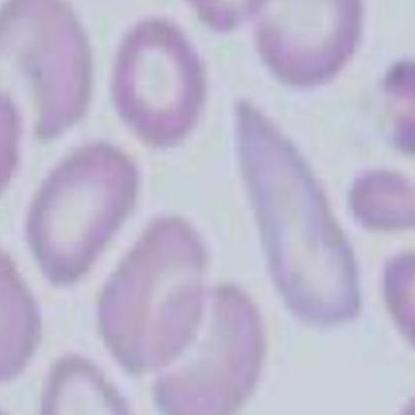

/content/fragments/fragment759_1771.jpg


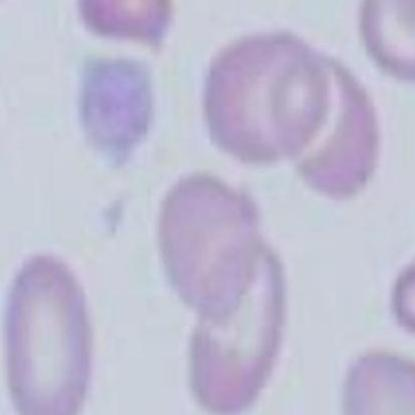

/content/fragments/fragment1518_759.jpg


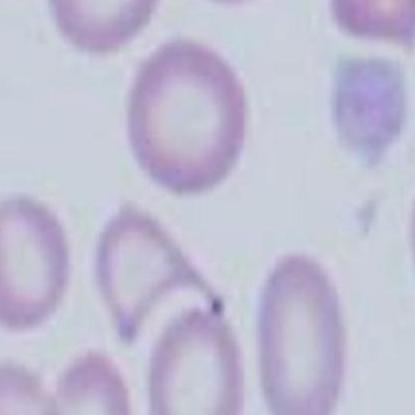

/content/fragments/fragment1518_506.jpg


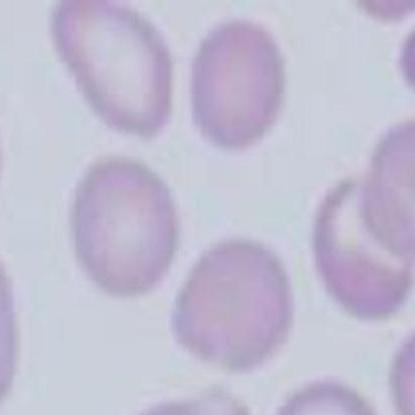

/content/fragments/fragment0_1518.jpg


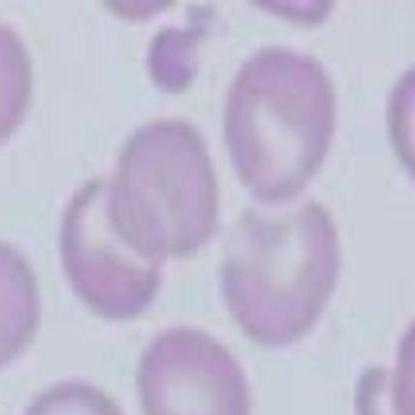

/content/fragments/fragment0_1771.jpg


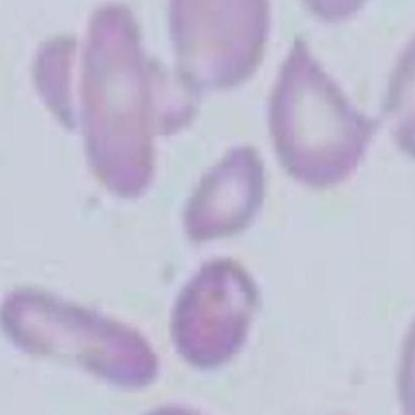

/content/fragments/fragment1771_1518.jpg


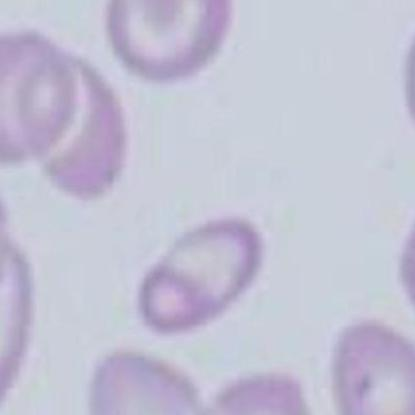

/content/fragments/fragment1518_1012.jpg


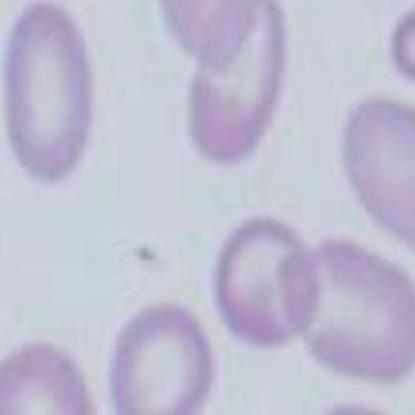

/content/fragments/fragment1771_759.jpg


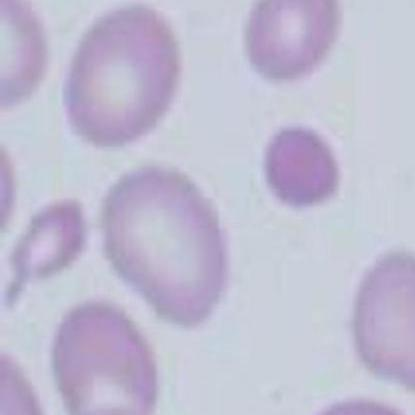

/content/fragments/fragment1771_0.jpg


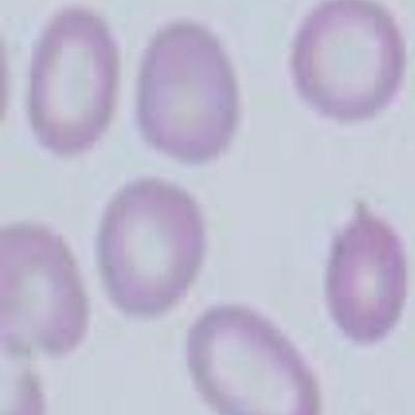

/content/fragments/fragment1265_0.jpg


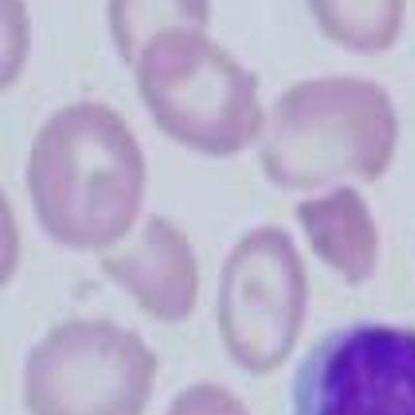

/content/fragments/fragment506_0.jpg


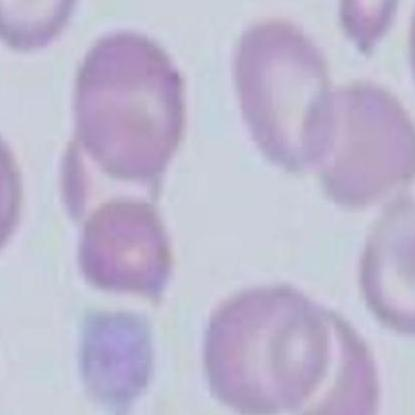

/content/fragments/fragment1265_759.jpg


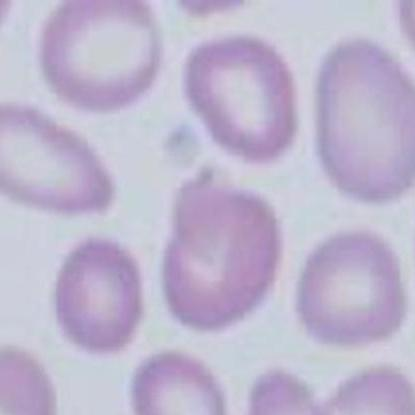

/content/fragments/fragment0_506.jpg


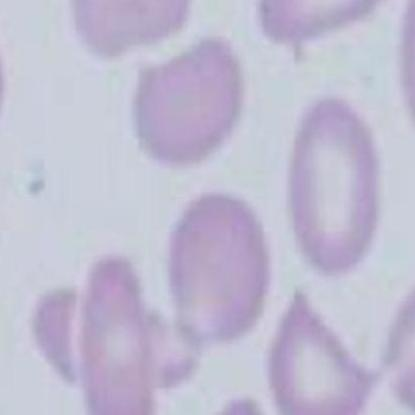

/content/fragments/fragment1518_1518.jpg


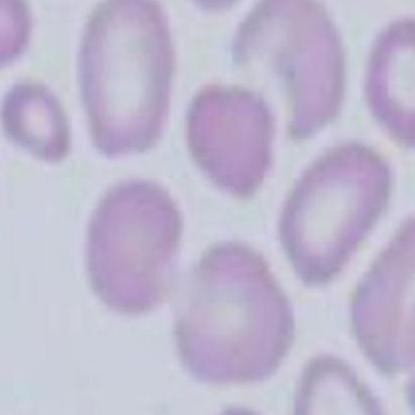

/content/fragments/fragment759_1518.jpg


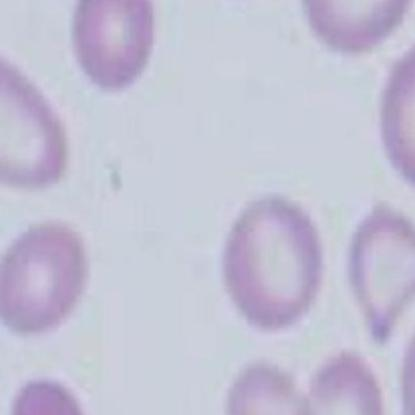

/content/fragments/fragment1518_253.jpg


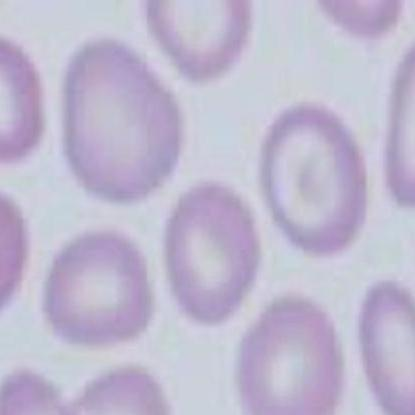

/content/fragments/fragment0_759.jpg


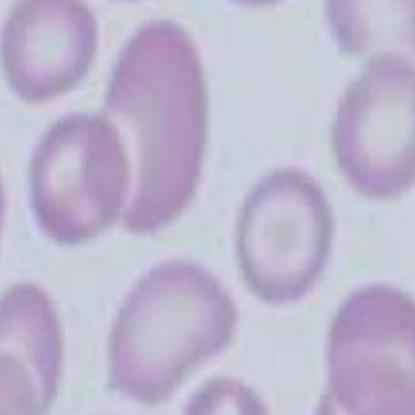

/content/fragments/fragment1012_506.jpg


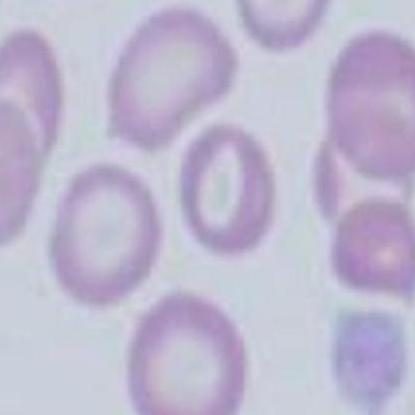

/content/fragments/fragment1265_506.jpg


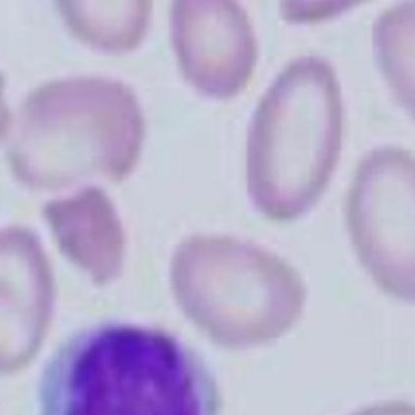

/content/fragments/fragment506_253.jpg


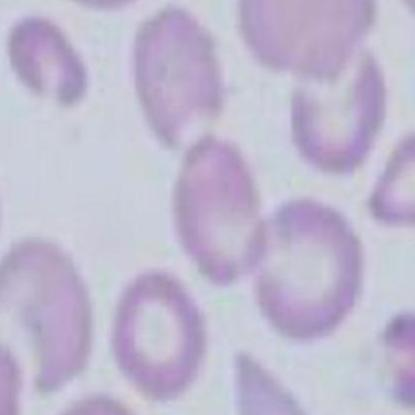

/content/fragments/fragment506_1771.jpg


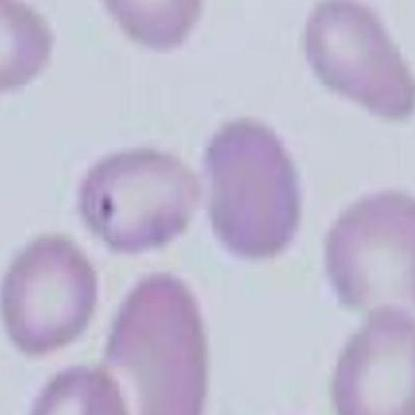

/content/fragments/fragment759_506.jpg


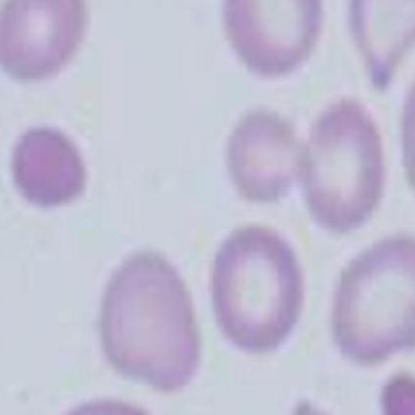

/content/fragments/fragment1771_253.jpg


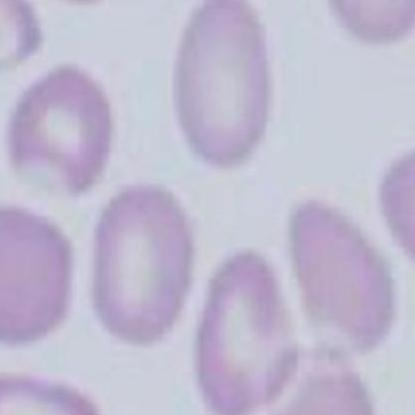

/content/fragments/fragment253_1265.jpg


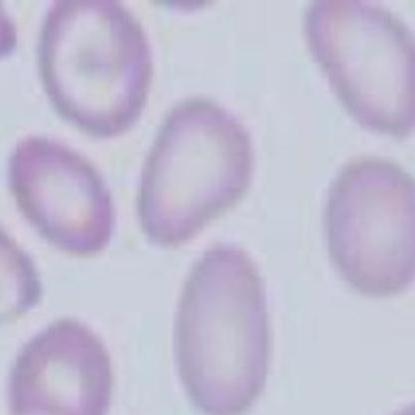

/content/fragments/fragment0_1265.jpg


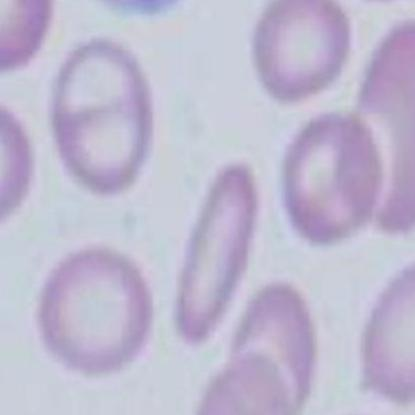

/content/fragments/fragment1012_253.jpg


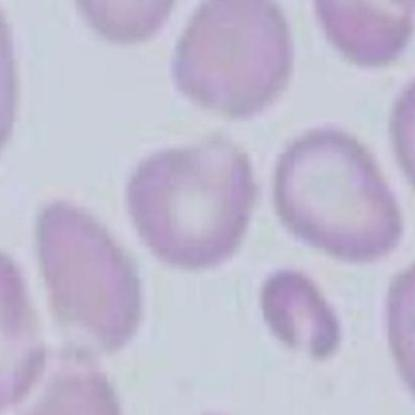

/content/fragments/fragment253_1518.jpg


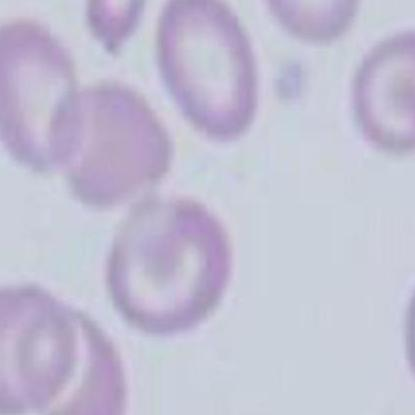

/content/fragments/fragment1265_1012.jpg


In [63]:
# from IPython.display import Image
# from IPython.display import display

# x = Image(filename=f'{image_path}' + "0_0.jpg")
# y = Image(filename=f'{image_path}' + "0_1.jpg")
# display(x, y)

import glob
from IPython.display import display, Image

for image_path in glob.glob(f"/content/fragments/fragment*.jpg"):
  display(Image(filename=image_path, width=416))
  print(image_path)

In [64]:
%cp /content/fragments/* /content/gdrive/My\ Drive/fragments

In [67]:
model = YOLO("/content/yolov8/weights/best.pt")
results = model.predict(source=f"/content/fragments/fragment*.jpg", show=True, imgsz=416, save_txt=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/64 /content/fragments/fragment0_0.jpg: 416x416 7 RBCs, 16.4ms
image 2/64 /content/fragments/fragment0_1012.jpg: 416x416 11 RBCs, 27.7ms
image 3/64 /content/fragments/fragment0_1265.jpg: 416x416 9 RBCs, 20.3ms
image 4/64 /content/fragments/fragment0_1518.jpg: 416x416 6 RBCs, 2 WBCs, 14.2ms
image 5/64 /content/fragments/fragment0_1771.jpg: 416x416 8 RBCs, 1 WBC, 11.8ms
image 6/64 /content/fragments/fragment0_253.jpg: 416x416 9 RBCs, 11.0ms
image 7/64 /content/fragments/fragment0_506.jpg: 416x416 9 RBCs, 3 WBCs, 10.0ms
image 8/64 /content/fragments/fragment0_759.jpg: 416x416 10 RBCs, 2 WBCs, 10.1ms
image 9/64 /content/fragments/fragment1012_0.jpg: 416x416 7 RBCs, 1 WBC, 9.3ms
image 10/64 /content/fragments/fragment1012_1012.jpg: 416x416 10 RBCs, 9.7ms
image 11/64 /content/fragments/fragment1012_1265.jpg: 416x416 5 RBCs, 1 WBC, 9.7ms
image 12/64 /content/fragments/fragment1012_1518.jpg: 416x416 8 RBCs, 2 WBC